## Neural Network


In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [116]:
def split_data(df, X, Y):
    arr_rand = np.random.rand(df.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)
    
    X_train = X[split]
    Y_train = Y[split]
    X_test =  X[~split]
    Y_test = Y[~split]

#     print(len(X_train), len(Y_train), len(X_test), len(Y_test))
    return X_train, Y_train, X_test, Y_test

In [117]:
data = pd.read_csv('hw3data', sep="\t", header=None)
x = np.hstack((np.ones((data.shape[0], 1)), data.drop(data.columns[2], axis=1)))
y = data[2]
# Convert Class-1 and Class-2 into 0's and 1's
for i, val in enumerate(y):
    if val == "Class-1":
        y[i] = 0
    else:
        y[i] = 1

X_train, Y_train, X_test, Y_test = split_data(data, x, y)      

/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [118]:
# Sigmoid activation function
def activation_func(value):
    return (1 / (1 + np.exp(-value)))

In [119]:
# Function to return mea squared error
def mse(y_predicted, Y_test):
    return np.sum((y_predicted - Y_test) ** 2) / len(y_predicted)

In [120]:
# Derivative of sigmoid function
def sigmoid_derivative(val):
    return activation_func(val) * (1 - activation_func(val))

In [142]:
def predict_values(X_test, Y_test, weights):
    weights_1 = weights[0]
    weights_2 = weights[1]
    n = Y_test.shape[0]
    Y_test = np.array(Y_test).reshape(n, 1)
    # Forward pass
    z_1 = np.dot(X_test, weights_1)
    act_1 = activation_func(z_1)
    z_2 = np.dot(act_1, weights_2)
    y_predicted = activation_func(z_2)
    ctr = 0
    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    for i, val in enumerate(y_predicted):
        if y_predicted[i] == Y_test[i]:
            ctr += 1
    
    print('CORRECT', ctr)
    accuracy = (ctr / len(Y_test)) * 100
    print('ACCURACY', accuracy)

    return y_predicted, accuracy

In [162]:
# Model to train the perceptron using delta rule
def perceptron_train(x, y, alpha, iterations):
    # converting into numpy
    X = np.array(x)
    # dtype is a numpy.object, converting the array into astype(float)
    # otherwise it will show a message saying numpy.float64 has no attribute log10
    X = X.astype(float) 
    n = X.shape[0]
    Y = np.array(y).reshape(n, 1)
    Y = Y.astype(float) 
    
    # Eandomly initialising random weights 
    # weights = [L-1, L] where L-1 => no of neurons in prev layer, L => neurons in current neurons
    weights_1 = np.random.random((3, 6))
    weights_2 = np.random.random((6, 1))
    
    # Final arr to include all errors
    loss_arr = []
    
    # Looping over through for N iterations
    for i in range(iterations):
        # Calcuating the predicted values of Y
        z_1 = np.dot(X, weights_1)
        act_1 = activation_func(z_1)
        z_2 = np.dot(act_1, weights_2)
        y_predicted = activation_func(z_2)
#         print('w_2', weights_2.shape)
#         print('w_1', weights_1.shape)
#         print('z_1', z_1.shape)
#         print('act_1', act_1.shape)
#         print('z_2', z_2.shape)
#         print('y_predicted', y_predicted.shape)
#         print('sigmoid_derivative(z_2)', sigmoid_derivative(z_2).shape)
#         print('sigmoid_derivative(z_1)', sigmoid_derivative(z_1).shape)
        
#         print('y_predicted - Y', (y_predicted - Y).shape)
#         print('X', X.shape)
#         test = ((y_predicted - Y) * sigmoid_derivative(z_2))
#         print('test', test.shape)
        
        #Calucating mean squared loss
        loss_j = mse(y_predicted, Y)
#         print('Iteration' + str(i), loss_j)
        
        weights_1 = weights_1 - ((1/len(y_predicted)) * ( alpha * np.dot(np.transpose(X), ((y_predicted - Y) * sigmoid_derivative(z_2) * sigmoid_derivative(z_1)))))
#         print('weights_1', weights_1.shape)

        weights_2 = weights_2 - ((1/len(y_predicted)) * ( alpha * np.dot(np.transpose(act_1), ((y_predicted - Y) * sigmoid_derivative(z_2)))))
#         print('weight_2', weights_2.shape)
        
        loss_arr.append(loss_j)
    return loss_arr, (weights_1, weights_2)

loss_arr, weights = perceptron_train(X_train, Y_train, 0.001, 200000)
        

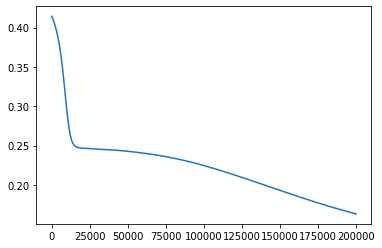

In [163]:
# Plotting the graph for the loss J decreases over time
x_arr = np.arange(0,200000,1)
loss_arr = np.array(loss_arr)
plt.plot(x_arr, loss_arr)

In [164]:
y_predicted, accuracy = predict_values(X_test, Y_test, weights)

CORRECT 39
ACCURACY 86.66666666666667
